##Installing FastAI

In [1]:
!pip install fastai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 36.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.6/823.6 kB 47.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 69.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.7/731.7 MB 727.3 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.6/410.6 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.6/121.6 MB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.5/56.5 MB 10.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.2/124.2 MB 8.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 196.0/196.0 MB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 166.0/166.0 MB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.1/99.1 kB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 66.7 MB/s eta 0:00:00


##Importing Necessary Libraries

In [3]:
from fastai.tabular.all import *
import pandas as pd


##Loading and Preprocessing the Data

In [4]:

train_df = pd.read_csv('/content/adult.data', header=None)
test_df = pd.read_csv('/content/adult.test', header=None, skiprows=1)


In [5]:
columns = ['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status',
           'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
           'hours-per-week', 'native-country', 'salary']
train_df.columns = columns
test_df.columns = columns


In [15]:
train_df['salary'] = train_df['salary'].str.replace('.', '')
test_df['salary'] = test_df['salary'].str.replace('.', '')

<ipython-input-15-99d7fae7a58b>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train_df['salary'] = train_df['salary'].str.replace('.', '')
<ipython-input-15-99d7fae7a58b>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  test_df['salary'] = test_df['salary'].str.replace('.', '')


##Preprocessing Steps

In [6]:
procs = [Categorify, FillMissing, Normalize]
cat_names = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']
cont_names = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dep_var = 'salary'


In [7]:
splits = RandomSplitter(valid_pct=0.2)(range_of(train_df))
to = TabularPandas(train_df, procs, cat_names, cont_names, y_names=dep_var, splits=splits)


##Prepare the DataLoader

In [8]:
dls = to.dataloaders(bs=64)


##Train the Model

In [9]:
learn = tabular_learner(dls, metrics=accuracy)
learn.fit_one_cycle(5)


epoch,train_loss,valid_loss,accuracy,time
0,0.395050,0.331072,0.852887,00:07
1,0.336219,0.321275,0.847512,00:07
2,0.338079,0.315803,0.856419,00:06
3,0.315232,0.309859,0.854423,00:11
4,0.305585,0.311796,0.856880,00:08


##Evaluating the Model

In [10]:
learn.show_results()


,workclass,education,marital-status,occupation,relationship,race,sex,native-country,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,salary,salary_pred
0,3.0,8.0,3.0,2.0,6.0,5.0,1.0,40.0,-0.779732,0.222620,0.745751,-0.147526,-0.217331,-0.033591,1.0,0.0
1,3.0,13.0,6.0,11.0,5.0,5.0,1.0,40.0,0.759765,1.087177,1.524680,-0.147526,-0.217331,2.403785,0.0,0.0
2,5.0,12.0,3.0,8.0,1.0,5.0,2.0,40.0,1.346239,0.640461,-0.422641,-0.147526,-0.217331,-0.033591,0.0,0.0
3,5.0,12.0,3.0,5.0,1.0,5.0,2.0,40.0,-0.633113,0.507195,-0.422641,-0.147526,-0.217331,-0.033591,0.0,0.0
4,5.0,1.0,5.0,9.0,4.0,5.0,1.0,40.0,-1.512825,-0.358027,-1.591033,-0.147526,-0.217331,-3.039688,0.0,0.0
5,6.0,15.0,3.0,11.0,1.0,5.0,2.0,40.0,0.099980,0.015946,1.914144,1.928252,-0.217331,-0.033591,1.0,1.0
6,5.0,16.0,5.0,8.0,3.0,5.0,2.0,40.0,-1.439516,0.857628,-0.033177,-0.147526,-0.217331,0.778867,0.0,0.0
7,8.0,11.0,3.0,2.0,1.0,5.0,2.0,40.0,1.053002,-1.296608,2.303608,-0.147526,-0.217331,0.778867,1.0,1.0
8,3.0,12.0,3.0,5.0,1.0,5.0,2.0,40.0,2.006024,-0.099365,-0.422641,0.326653,-0.217331,-1.658509,0.0,0.0


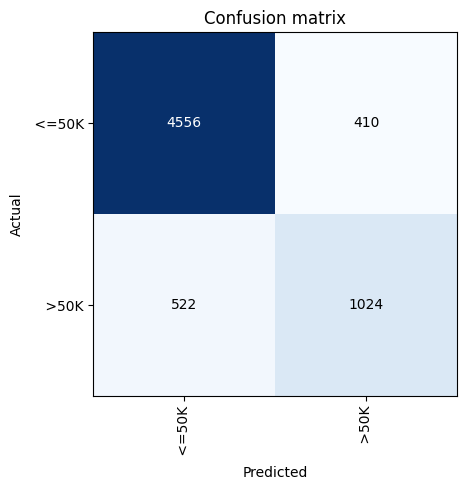

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()


##Predictions on Test Data

In [16]:
test_dl = learn.dls.test_dl(test_df, bs=64)
test_preds, _ = learn.get_preds(dl=test_dl)


In [21]:
# Choosing a few key features that you believe are important for the prediction
key_features = ['age', 'workclass', 'education', 'occupation', 'relationship', 'hours-per-week']

# Combining the key features and the predicted classes for the first few samples
for i in range(5):
    features_str = ", ".join([f"{feature}: {test_df.iloc[i][feature]}" for feature in key_features])
    print(f"Sample {i+1}: {features_str}, Predicted class - {predicted_classes[i]}")


Sample 1: age: 38, workclass:  Private, education:  HS-grad, occupation:  Farming-fishing, relationship:  Husband, hours-per-week: 50, Predicted class - <=50K
Sample 2: age: 28, workclass:  Local-gov, education:  Assoc-acdm, occupation:  Protective-serv, relationship:  Husband, hours-per-week: 40, Predicted class - <=50K
Sample 3: age: 44, workclass:  Private, education:  Some-college, occupation:  Machine-op-inspct, relationship:  Husband, hours-per-week: 40, Predicted class - >50K
Sample 4: age: 18, workclass:  ?, education:  Some-college, occupation:  ?, relationship:  Own-child, hours-per-week: 30, Predicted class - <=50K
Sample 5: age: 34, workclass:  Private, education:  10th, occupation:  Other-service, relationship:  Not-in-family, hours-per-week: 30, Predicted class - <=50K
